In [3]:
from sklearn.metrics import roc_auc_score
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = []
for chunk_size in [100, 300, 500, 750, 1000, 2000, 3000]:
    with open(f'results/scale_large_{chunk_size}_results.json', 'r') as file:
        data.append(json.load(file))

In [34]:
scores = []
for d in data:
    print(roc_auc_score(d[1], d[0]))
    scores.append(roc_auc_score(d[1], d[0]))

0.6662747732616727
0.7198382040085096
0.735415966857015
0.7545347665435
0.7614348897099987
0.7561723211286531
0.7603571828462657


In [38]:
time = []
for d in data:
    print(d[2])
    time.append(d[2])

7288.216945648193
2255.618494987488
1993.1078050136566
1956.2376837730408
1991.6615478992462
2548.824840784073
3105.229977607727


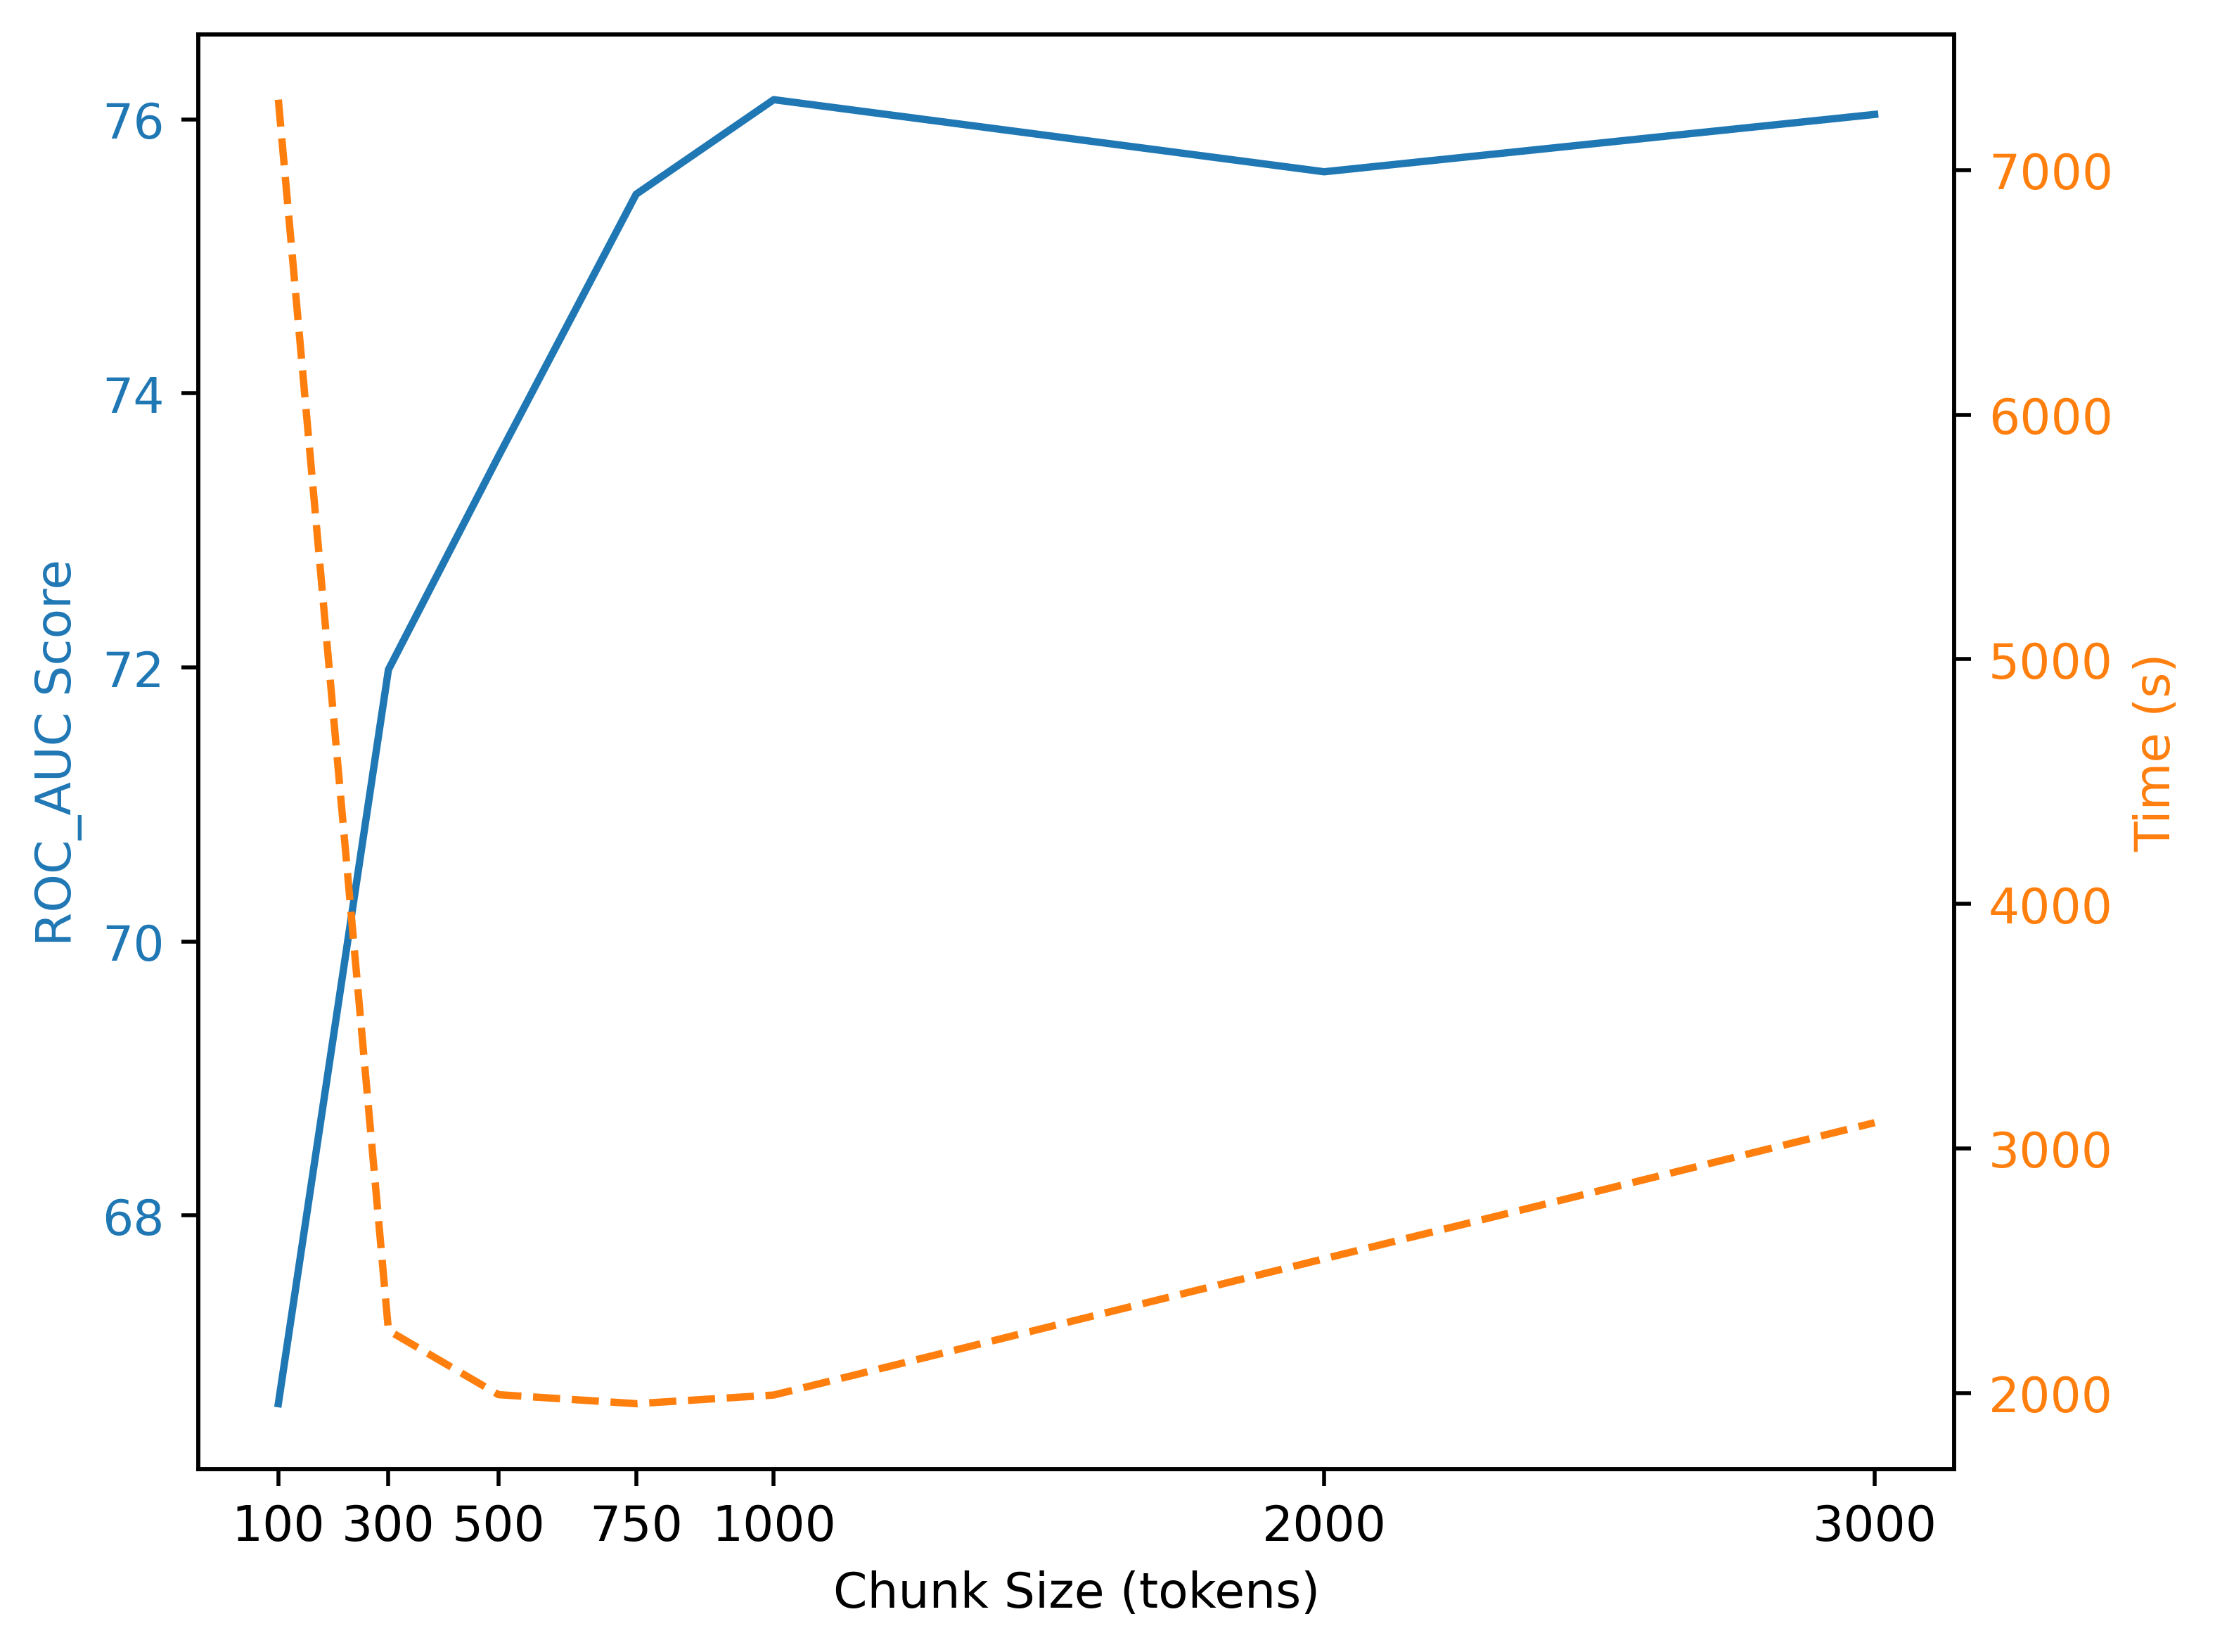

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = np.array([
    [100, 7288.216946, 66.627477],
    [300, 2255.618495, 71.983820],
    [500, 1993.107805, 73.541597],
    [750, 1956.237684, 75.453477],
    [1000, 1991.661548, 76.143489],
    [2000, 2548.824841, 75.617232],
    [3000, 3105.229978, 76.035718]
])

x = data[:, 0]
y1 = data[:, 1]
y2 = data[:, 2]

# Initial chart setup
fig, ax1 = plt.subplots()

# First axis - "Lower is better" (e.g., SCALE_large_f)
color = 'tab:blue'
ax1.set_xlabel('Chunk Size (tokens)')
ax1.set_ylabel('ROC_AUC Score', color=color)
ax1.plot(x, y2, color=color, linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Second axis - "Higher is better" (e.g., SCALE_large)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Time (s)', color=color)
ax2.plot(x, y1, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Show chart
# plt.title('Dual Y-Axis Line Chart - Switched Axes')
ax1.set_xticks([100, 300, 500, 750, 1000, 2000, 3000])
plt.tight_layout()
plt.rcParams['figure.dpi'] = 500
plt.show()